In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tune_sklearn import TuneGridSearchCV
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_excel("HH_Input.xlsx")

df

,Unnamed: 0,Target,n-1,n-2,n-3,n-4,n-5,dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%)
0,0,12.60,12.80,11.90,13.50,12.30,12.80,0,0,1,1,6.1,2.0,84.33
1,1,11.90,12.60,12.80,11.90,13.50,12.30,0,0,1,1,6.0,1.6,80.44
2,2,13.00,11.90,12.60,12.80,11.90,13.50,0,0,1,1,6.0,1.6,80.44
3,3,11.91,13.00,11.90,12.60,12.80,11.90,0,0,1,1,5.8,1.7,82.54
4,4,11.90,11.91,13.00,11.90,12.60,12.80,0,0,1,1,5.8,1.7,82.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35030,35030,13.56,15.12,15.00,14.56,15.00,15.31,1,0,0,12,6.5,3.3,88.23
35031,35031,13.81,13.56,15.12,15.00,14.56,15.00,1,0,0,12,6.6,4.4,87.69
35032,35032,14.12,13.81,13.56,15.12,15.00,14.56,1,0,0,12,6.6,4.4,87.69
35033,35033,14.50,14.12,13.81,13.56,15.12,15.00,1,0,0,12,6.7,4.1,88.13


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df

,Target,n-1,n-2,n-3,n-4,n-5,dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%)
0,12.60,12.80,11.90,13.50,12.30,12.80,0,0,1,1,6.1,2.0,84.33
1,11.90,12.60,12.80,11.90,13.50,12.30,0,0,1,1,6.0,1.6,80.44
2,13.00,11.90,12.60,12.80,11.90,13.50,0,0,1,1,6.0,1.6,80.44
3,11.91,13.00,11.90,12.60,12.80,11.90,0,0,1,1,5.8,1.7,82.54
4,11.90,11.91,13.00,11.90,12.60,12.80,0,0,1,1,5.8,1.7,82.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35030,13.56,15.12,15.00,14.56,15.00,15.31,1,0,0,12,6.5,3.3,88.23
35031,13.81,13.56,15.12,15.00,14.56,15.00,1,0,0,12,6.6,4.4,87.69
35032,14.12,13.81,13.56,15.12,15.00,14.56,1,0,0,12,6.6,4.4,87.69
35033,14.50,14.12,13.81,13.56,15.12,15.00,1,0,0,12,6.7,4.1,88.13


In [4]:
feature_cols = ['n-1', 'n-2', 'n-3', 'n-4', 'n-5', 'dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']

X = df[feature_cols] # Features
y = df.Target # Target variable

#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) #split training:testing 75:25

scaler = StandardScaler() #scaling
X_scaled = scaler.fit_transform(X)


In [16]:
model_params = {
    'svm': {
        'model': svm.SVR(gamma='auto'),
        'params' : {
            'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50],
            'kernel': ['sigmoid','rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestRegressor(criterion='absolute_error'),
        'params' : {
            'n_estimators': [10, 20, 30, 40, 50, 75, 100],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40],
            'solver': ['newton-cg']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'k_nearest_neighbour' : {
        'model' : KNeighborsRegressor(),
        'params': {
                'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25],
                'weights': ['uniform', 'distance']                
            }
    }   
}

In [18]:
from tune_sklearn import TuneGridSearchCV
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  TuneGridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_scaled, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

NameError: name 'scores' is not defined

# Random Forest Regressor

##### About the error messages
When using TuneGridSearch we get Fatal error messages. I looked them up and all sources said that they can be ignored.

In [34]:
N = range(10,1011,100)

RFR = TuneGridSearchCV(RandomForestRegressor(random_state=42), {
    'n_estimators': N
}, cv=5, return_train_score=False)
RFR.fit(X_scaled, y)

RFR_results = pd.DataFrame(RFR.cv_results_)
RFR_results = RFR_results[['param_n_estimators', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
RFR_results

(pid=17036) Windows fatal exception: access violation
(pid=17036) 
(pid=15388) Windows fatal exception: access violation
(pid=15388) 
(pid=7300) Windows fatal exception: access violation
(pid=7300) 
(pid=17108) Windows fatal exception: access violation
(pid=17108) 


,param_n_estimators,mean_test_score,rank_test_score
7,710,0.964410,1
8,810,0.964405,2
10,1010,0.964401,3
9,910,0.964399,4
6,610,0.964395,5
5,510,0.964378,6
4,410,0.964341,7
3,310,0.964304,8
2,210,0.964229,9
1,110,0.964069,10


In [38]:
N = range(5,96,10)

RFR1 = TuneGridSearchCV(RandomForestRegressor(random_state=42), {
    'n_estimators': N
}, cv=5, return_train_score=False)
RFR1.fit(X_scaled, y)

RFRresults1 = pd.DataFrame(RFR1.cv_results_)
RFRresults1 = RFRresults1[['param_n_estimators', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
RFRresults1



(pid=13260) Windows fatal exception: access violation
(pid=13260) 
(pid=14220) Windows fatal exception: access violation
(pid=14220) 
(pid=10220) Windows fatal exception: access violation
(pid=10220) 
(pid=12696) Windows fatal exception: access violation
(pid=12696) 


,param_n_estimators,mean_test_score,rank_test_score
9,95,0.964005,1
8,85,0.963922,2
7,75,0.963917,3
6,65,0.963791,4
5,55,0.963710,5
4,45,0.963557,6
3,35,0.963343,7
2,25,0.962944,8
1,15,0.962071,9
0,5,0.957270,10


In [40]:
RFRresults2 = RFR_results.copy()
RFRresults = RFRresults2.append(RFRresults1)
RFRresults

,param_n_estimators,mean_test_score,rank_test_score
0,10,0.960858,11
1,110,0.964069,10
2,210,0.964229,9
3,310,0.964304,8
4,410,0.964341,7
5,510,0.964378,6
6,610,0.964395,5
7,710,0.964410,1
8,810,0.964405,2
9,910,0.964399,4


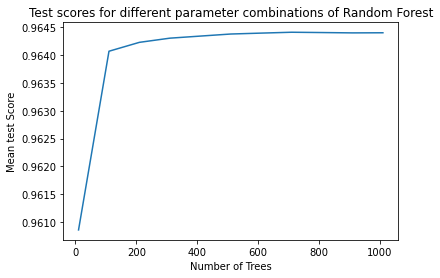

In [35]:
RFR_results = RFR_results.sort_values(by=['param_n_estimators'])
plt.plot(RFR_results['param_n_estimators'], RFR_results['mean_test_score'])


plt.xlabel('Number of Trees')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores for different parameter combinations of Random Forest')
# Display a figure.
plt.show()

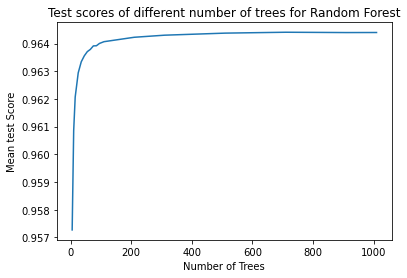

In [42]:
RFRresults = RFRresults.sort_values(by=['param_n_estimators'])
plt.plot(RFRresults['param_n_estimators'], RFRresults['mean_test_score'])


plt.xlabel('Number of Trees')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores of different number of trees for Random Forest')
# Display a figure.
plt.show()

# KNN


In [46]:
N = range(1,50,1)

KNN = TuneGridSearchCV(KNeighborsRegressor(), {
    'n_neighbors': N,
    'weights': ['uniform', 'distance']
}, cv=5, return_train_score=False)
KNN.fit(X_scaled, y)
KNN_results = pd.DataFrame(KNN.cv_results_)
KNN_results = KNN_results[['param_n_neighbors', 'param_weights', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
KNN_results

The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
The `callbacks.on_trial_result` operation took 2.195 s, which may be a performance bottleneck.
The `process_trial_result` operation took 2.240 s, which may be a performance bottleneck.
Processing trial results took 2.241 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
The `process_trial` operation took 2.243 s, which may be a performance bottleneck.
(pid=10380) Windows fatal exception: access violation
(pid=10380) 
(pid=13748) Windows fatal exception: access violation
(pid=13748) 
(pid=3048) Windows fatal exception: access violation
(pid=3048) 
(pid=16624) Windows fatal exception: access violation
(pid=16624) 


,param_n_neighbors,param_weights,mean_test_score,rank_test_score
64,16,distance,0.929367,1
63,15,distance,0.929291,2
65,17,distance,0.929267,3
66,18,distance,0.929245,4
62,14,distance,0.929213,5
...,...,...,...,...
51,3,distance,0.914628,94
1,2,uniform,0.904657,95
50,2,distance,0.904626,96
49,1,distance,0.878950,97


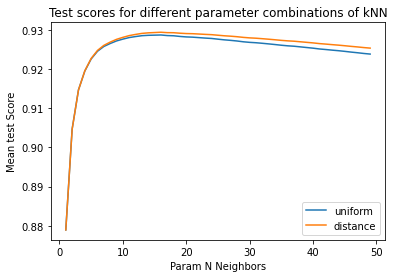

In [47]:
KNNuniform = KNN_results[(KNN_results['param_weights'] == 'uniform' )].sort_values(by = ['param_n_neighbors'])
KNNdistance = KNN_results[(KNN_results['param_weights'] == 'distance' )].sort_values(by = ['param_n_neighbors'])

plt.plot(KNNuniform['param_n_neighbors'], KNNuniform['mean_test_score'], label = 'uniform')
plt.plot(KNNdistance['param_n_neighbors'], KNNdistance['mean_test_score'], label = 'distance')

plt.xlabel('Param N Neighbors')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores for different parameter combinations of kNN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# SVM Regression

In [ ]:
SVM = TuneGridSearchCV(svm.SVR(gamma='scale'), {
    'C': [0.01, 0.1, 1, 100, 10000],
    'kernel': ['rbf','linear'],
    'epsilon': [0.01,0.1,1,10]
}, cv=5, return_train_score=False)
SVM.fit(X_scaled, y)

svm_results = pd.DataFrame(SVM.cv_results_)
svmresults = svm_results[['param_kernel','param_C','param_epsilon', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
svmresults

2022-01-17 06:25:58,950	WARNING tune.py:518 -- SIGINT received (e.g. via Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C one more time (or send SIGINT/SIGKILL/SIGTERM) to skip. 


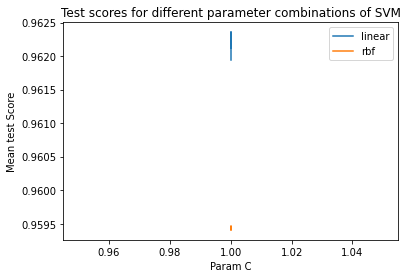

In [51]:
SVMlinear = svm_results[(svm_results['param_kernel'] == 'linear' )].sort_values(by = ['param_C'])
SVMrbf = svm_results[(svm_results['param_kernel'] == 'rbf' )].sort_values(by = ['param_C'])


plt.plot(SVMlinear['param_C'], SVMlinear['mean_test_score'], label = 'linear')
plt.plot(SVMrbf['param_C'], SVMrbf['mean_test_score'], label = 'rbf')

plt.xlabel('Param C')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores for different parameter combinations of SVM')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [65]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    'C': np.logspace(-6, 6, 30),
    'gamma': np.logspace(-8, 8, 30),
    'kernel': ['rbf','linear'],
}
search = RandomizedSearchCV(svm.SVR(), param_space, cv=5, n_iter=1, verbose=10)

import joblib
from ray.util.joblib import register_ray
register_ray()
with joblib.parallel_backend('ray'):
    search.fit(X_scaled, y)

print(tune_search.best_params_) 
svm_results = pd.DataFrame(SVM.cv_results_)
#svm_results = svm_results[['param_kernel','param_C', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
svm_results

2022-01-16 07:51:06,127	WARNING pool.py:470 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
(pid=15972) [CV 1/5; 1/1] START C=22122.1629107045, gamma=85.31678524172814, kernel=rbf.....
(pid=17380) [CV 2/5; 1/1] START C=22122.1629107045, gamma=85.31678524172814, kernel=rbf.....
(pid=17696) [CV 3/5; 1/1] START C=22122.1629107045, gamma=85.31678524172814, kernel=rbf.....
(pid=15972) [CV 1/5; 1/1] END C=22122.1629107045, gamma=85.31678524172814, kernel=rbf; total time=11.6min
(pid=17696) [CV 3/5; 1/1] END C=22122.1629107045, gamma=85.31678524172814, kernel=rbf; total time=11.6min
(pid=17380) [CV 2/5; 1/1] END C=22122.1629107045, gamma=85.31678524172814, kernel=rbf; total time=12.0min
(pid=17380) [CV 4/5; 1/1] START C=22122.1629107045, gamma=85.31678524172814, kernel=rbf.....
(pid=17380) [CV 4/5; 1/1] END C=22122.1629107045, gamma=85.31678524172814, kernel=rbf; total time= 7.6min
(pid=17380) [CV 5/5; 1/1] START C=22122.1629107045, gamma=85.31678524172814, kernel=rbf.....
(pid=17380) [CV 5/5; 1/1] END C=22122.1629107045, ga

NameError: name 'tune_search' is not defined

In [68]:
svm_results = pd.DataFrame(search.cv_results_)
svm_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,563.124419,116.839963,41.130446,8.673151,rbf,85.316785,22122.162911,"{'kernel': 'rbf', 'gamma': 85.31678524172814, ...",-0.028489,-0.254622,-0.001039,-0.025257,0.006161,-0.060649,0.097907,1
